<a href="https://colab.research.google.com/github/mracriz/ac/blob/master/wordembedding_videocaptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cols_names = ['id','title','channel','date_p','description','views','likes','dislikes','comments','captions']

###Dataframe com dados que indicam desinformacao

In [ ]:
df_1 = pd.read_csv('desinformacao.txt', sep=';', names=cols_names)
label_1 = np.linspace(1,1,df_1.shape[0],dtype='int')
df_1['label'] = label_1
df_1.head(5)

,id,title,channel,date_p,description,views,likes,dislikes,comments,captions,label
0,iBkc0ZhnKNk,"Bolsonaro fala sobre Semipresidencialismo, Car...",Foco do Brasil,2021-11-22T12:56:43Z,As notícias e ações do Presidente Jair Bolsona...,54796.0,430962,592.0,3871,"[{'text': 'eb1', 'start': 0.12, 'duration': 7....",1
1,jKRLLlRH7u4,"Bolsonaro diz que Moro não aprendeu nada, fala...",Foco do Brasil,2021-11-11T13:04:06Z,As notícias e ações do Presidente Jair Bolsona...,20476.0,124783,231.0,1449,[{'text': 'o presidente acompanhada por que a'...,1
2,LIGimPNbkNg,- Entrevista: Rádio Cultura FM (ES),Jair Bolsonaro,2021-11-10T13:13:06Z,TEMAS: . A VERDADE SOBRE PRECATÓRIOS . GÁS DE ...,12779.0,49091,196.0,814,"[{'text': 'oi', 'start': 0.0, 'duration': 3.65...",1
3,_kGgQToWUNA,"Bolsonaro fala sobre PL, Sabatina, Voto Eletrô...",Foco do Brasil,2021-11-09T13:16:17Z,As notícias e ações do Presidente Jair Bolsona...,45168.0,434220,696.0,2580,"[{'text': 'Bom', 'start': 0.0, 'duration': 5.8...",1
4,nNYzVzCPXBY,Bolsonaro fala em encontro com a Globo em 2022...,Foco do Brasil,2021-11-22T23:26:53Z,As notícias e ações do Presidente Jair Bolsona...,27599.0,224756,334.0,1694,"[{'text': 'E aí', 'start': 0.0, 'duration': 7....",1


###Dataframe com dados que indicam informacao

In [ ]:
df_2 = pd.read_csv('informacao.txt',sep = ';',names=cols_names)
label_2 = np.linspace(0,0,df_2.shape[0],dtype='int')
df_2['label'] = label_2
df_2.head(5)

,id,title,channel,date_p,description,views,likes,dislikes,comments,captions,label
0,lAVT0SO8QIE,"Expectativa de vida sobe para 76,8 anos, apesa...",Band Jornalismo,2021-11-25T13:37:36Z,"Aumentou a expectativa de vida no Brasil, segu...",19,602,4,2,[{'text': 'há 10 horas 32 minutinhos agora Aum...,0
1,S1gjCQvfgqM,Câmara pode votar hoje (25) MP do Auxílio Brasil,Band Jornalismo,2021-11-25T14:37:19Z,A Câmara dos Deputados pode votar hoje (25) a ...,6,29,0,0,[{'text': 'e a Câmara dos Deputados começa a S...,0
2,CzaInrkjIjk,Maiores de 18 anos poderão receber dose reforç...,Band Jornalismo,2021-11-25T12:48:34Z,"A partir de sábado (27) , todos os adultos mai...",10,99,0,1,[{'text': 'a partir de sábado também falando d...,0
3,tBmFEEVKJcE,Série documental sobre os Beatles estreia hoje...,Band Jornalismo,2021-11-25T12:56:34Z,Um novo documentário sobre os Beatles estreia ...,8,99,0,0,[{'text': 'é normal mas como ninguém Nem tudo ...,0
4,jjp3HkcjkaQ,Alemanha supera 100 mil mortes e bate recorde,Band Jornalismo,2021-11-25T12:44:59Z,A Alemanha superou hoje (25) o número de 100 m...,20,256,1,4,[{'text': 'algumas notícias aí espalhadas pelo...,0


###Dados antes de serem processados

In [ ]:
df_1.iloc[0,9]

"[{'text': 'eb1', 'start': 0.12, 'duration': 7.35}, {'text': '[Música]', 'start': 2.28, 'duration': 7.19}, {'text': 'E', 'start': 7.47, 'duration': 2.0}, {'text': 'aí', 'start': 13.219, 'duration': 3.0}, {'text': 'Maurício', 'start': 22.4, 'duration': 3.0}, {'text': 'Olha o', 'start': 25.429, 'duration': 5.731}, {'text': 'céu', 'start': 28.279, 'duration': 5.851}, {'text': 'vou ensinar a jogar vôlei que a', 'start': 31.16, 'duration': 6.06}, {'text': 'senhora tá meio devagar hein', 'start': 34.13, 'duration': 6.15}, {'text': '[Música]', 'start': 37.22, 'duration': 3.06}, {'text': '[Risadas]', 'start': 50.36, 'duration': 4.9}, {'text': 'nós', 'start': 53.44, 'duration': 4.82}, {'text': 'vamos', 'start': 55.26, 'duration': 3.0}, {'text': 'fazer essa', 'start': 58.289, 'duration': 4.54}, {'text': 'você que vou sair candidato deputado', 'start': 60.839, 'duration': 5.051}, {'text': 'federal e', 'start': 62.829, 'duration': 3.061}, {'text': 'o', 'start': 71.95, 'duration': 3.89}, {'text': '

In [ ]:
def processa_frases(dataset):
  
  n_linhas = dataset.shape[0]

  todas_palavras = []

  for h in range(n_linhas):
    
    aux = dataset.captions.values[h]
    palavras = []
    txt = aux.split(', ')
    
    for i in range(0,len(txt),3):
      if i == 0:
        txt[i] = txt[i].replace('[','')
      if i == len(txt) - 1:
        txt[i] = txt[i].replace(']','')
      txt[i] = txt[i].replace('{\'text\': ','')
      txt[i] = txt[i].replace('\'','')
      palavras.append(txt[i])

    string_final = ' '.join(map(str, palavras))
    dataset.iloc[h,9] = string_final
  
  return dataset

In [ ]:
df_1 = processa_frases(df_1)
df_2 = processa_frases(df_2)

###Dados depois de serem processados

In [ ]:
df_1.head(5)

,id,title,channel,date_p,description,views,likes,dislikes,comments,captions,label
0,iBkc0ZhnKNk,"Bolsonaro fala sobre Semipresidencialismo, Car...",Foco do Brasil,2021-11-22T12:56:43Z,As notícias e ações do Presidente Jair Bolsona...,54796.0,430962,592.0,3871,eb1 [Música] E aí Maurício Olha o céu vou ensi...,1
1,jKRLLlRH7u4,"Bolsonaro diz que Moro não aprendeu nada, fala...",Foco do Brasil,2021-11-11T13:04:06Z,As notícias e ações do Presidente Jair Bolsona...,20476.0,124783,231.0,1449,o presidente acompanhada por que a imprensa nã...,1
2,LIGimPNbkNg,- Entrevista: Rádio Cultura FM (ES),Jair Bolsonaro,2021-11-10T13:13:06Z,TEMAS: . A VERDADE SOBRE PRECATÓRIOS . GÁS DE ...,12779.0,49091,196.0,814,oi oi e partir pra luta sua vida e após presid...,1
3,_kGgQToWUNA,"Bolsonaro fala sobre PL, Sabatina, Voto Eletrô...",Foco do Brasil,2021-11-09T13:16:17Z,As notícias e ações do Presidente Jair Bolsona...,45168.0,434220,696.0,2580,Bom [Música] dia [Música] eu também fazer o qu...,1
4,nNYzVzCPXBY,Bolsonaro fala em encontro com a Globo em 2022...,Foco do Brasil,2021-11-22T23:26:53Z,As notícias e ações do Presidente Jair Bolsona...,27599.0,224756,334.0,1694,E aí [Música] E aí E [Música] olha que Lou Oi ...,1


In [ ]:
df_1.captions.values[0]

'eb1 [Música] E aí Maurício Olha o céu vou ensinar a jogar vôlei que a senhora tá meio devagar hein [Música] [Risadas] nós vamos fazer essa você que vou sair candidato deputado federal e o prefeito eleito de 71 anos filho Olha moça Oi bom dia Sérgio tudo bem e 48 vai filha o meu Deus obrigado a e olha a gente vai ter que não mas você vai que vai sorrir você achou no sábado e que Deus abençoe vai vir vai você vem você certinho o e obrigado tirava mental do Estado do Rio de Janeiro continua em seu apoio inclusivas veteranos Total apoio ao senhor tá ela dá umas hoje eu vou dar uma carona até pena eu sou reformados os adiante veteranos da Polícia Militar quatro do batalhão bar é servido a maré vermelha 2232 serviço sete anos a última gestão Coronel Álvaro García a ver é E servir no sexto Batalhão servindo 14º Batalhão e finalizei quando tiver um câncer né em 2013 Sou um Milagre igual sua fui curado em 2016 ou reformados ele 46 nódulos do pescoço as partes da liderança e apoia o senhor em t

###Concatenar dataframes

In [ ]:
df = pd.concat([df_1,df_2])
df.head(5)

,id,title,channel,date_p,description,views,likes,dislikes,comments,captions,label
0,iBkc0ZhnKNk,"Bolsonaro fala sobre Semipresidencialismo, Car...",Foco do Brasil,2021-11-22T12:56:43Z,As notícias e ações do Presidente Jair Bolsona...,54796.0,430962,592.0,3871,eb1 [Música] E aí Maurício Olha o céu vou ensi...,1
1,jKRLLlRH7u4,"Bolsonaro diz que Moro não aprendeu nada, fala...",Foco do Brasil,2021-11-11T13:04:06Z,As notícias e ações do Presidente Jair Bolsona...,20476.0,124783,231.0,1449,o presidente acompanhada por que a imprensa nã...,1
2,LIGimPNbkNg,- Entrevista: Rádio Cultura FM (ES),Jair Bolsonaro,2021-11-10T13:13:06Z,TEMAS: . A VERDADE SOBRE PRECATÓRIOS . GÁS DE ...,12779.0,49091,196.0,814,oi oi e partir pra luta sua vida e após presid...,1
3,_kGgQToWUNA,"Bolsonaro fala sobre PL, Sabatina, Voto Eletrô...",Foco do Brasil,2021-11-09T13:16:17Z,As notícias e ações do Presidente Jair Bolsona...,45168.0,434220,696.0,2580,Bom [Música] dia [Música] eu também fazer o qu...,1
4,nNYzVzCPXBY,Bolsonaro fala em encontro com a Globo em 2022...,Foco do Brasil,2021-11-22T23:26:53Z,As notícias e ações do Presidente Jair Bolsona...,27599.0,224756,334.0,1694,E aí [Música] E aí E [Música] olha que Lou Oi ...,1


###Divisao Treino/Teste

In [ ]:
y = df['label']
X = df['captions']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=43)

###Tokenizar

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import logging
plt.style.use('fivethirtyeight')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU
from tensorflow.keras.models import Sequential

In [ ]:
texts = X_train

In [ ]:
data = np.array(y_train)

In [ ]:
maxlen = 10000 
max_words = 30000 

tokenizer = Tokenizer(num_words=max_words) 
tokenizer.fit_on_texts(texts)

seq = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

padded_seq = np.array(pad_sequences(seq,maxlen=maxlen))

Converting data to Sequences
Data converted to Sequences...


In [ ]:
model = Sequential()
embedding = Embedding(max_words, 32, input_length = maxlen, name='embedding')
model.add(embedding)
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(padded_seq,np.asarray(data).astype(np.uint8),epochs=20,validation_split=0.1)

Epoch 1/20
1/1 [==============================] - 16s 16s/step - loss: 0.6937 - acc: 0.5161 - val_loss: 0.7056 - val_acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 12s 12s/step - loss: 0.6811 - acc: 0.6774 - val_loss: 0.7188 - val_acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 12s 12s/step - loss: 0.6692 - acc: 0.6129 - val_loss: 0.7358 - val_acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 12s 12s/step - loss: 0.6535 - acc: 0.6129 - val_loss: 0.7615 - val_acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 12s 12s/step - loss: 0.6307 - acc: 0.6129 - val_loss: 0.8109 - val_acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 12s 12s/step - loss: 0.5916 - acc: 0.6129 - val_loss: 0.9833 - val_acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 12s 12s/step - loss: 0.5107 - acc: 0.6129 - val_loss: 1.6222 - val_acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 12s 12s/step - loss

In [ ]:
def print_curva(H):
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.plot(H.history['loss'], label='loss')
    plt.plot(H.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title('loss')

    plt.subplot(1,2,2)
    plt.plot(H.history['acc'], label='acc')
    plt.plot(H.history['val_acc'], label='val_acc')
    plt.legend()
    plt.title('Acc')
    plt.show()

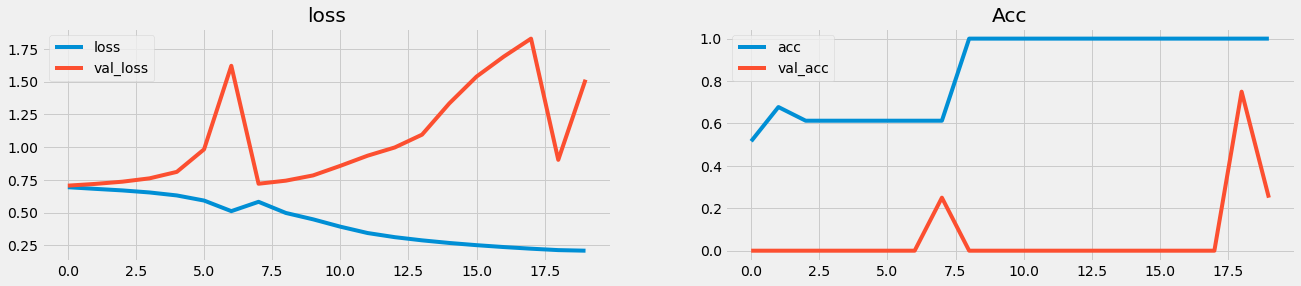

In [ ]:
print_curva(history)

In [ ]:
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen)
y_test = np.asarray(y_test)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.8566 - acc: 0.6667
